In [ ]:
# apiKey and secret key is needed to fetch data from binance

In [12]:
apiKey = 'wU9Ths328ugYK6ex5EJmiomgnwl9x2mGSxQIflx5iX8QlxcDAR9BQfFqZwlDPise'
secret = 'iOiBttuNS2PUCE7OWmtFV9p3rXSmjUKyZuPtLm7wMT1WtI0wxRWWRVvBocHZNNIp'

In [13]:
!pip install python-binance pandas mplfinance

In [15]:
from binance import Client, ThreadedWebsocketManager, ThreadedDepthCacheManager
import pandas as pd

# 2. Authenticate

In [16]:
client = Client(apikey, secret)

# 3. Get Tickers

In [17]:
tickers = client.get_all_tickers()
tickers

[{'symbol': 'ETHBTC', 'price': '0.06721000'},
 {'symbol': 'LTCBTC', 'price': '0.00267800'},
 {'symbol': 'BNBBTC', 'price': '0.01390900'},
 {'symbol': 'NEOBTC', 'price': '0.00040000'},
 {'symbol': 'QTUMETH', 'price': '0.00198700'},
 {'symbol': 'EOSETH', 'price': '0.00076800'},
 {'symbol': 'SNTETH', 'price': '0.00002439'},
 {'symbol': 'BNTETH', 'price': '0.00032000'},
 {'symbol': 'BCCBTC', 'price': '0.07908100'},
 {'symbol': 'GASBTC', 'price': '0.00010650'},
 {'symbol': 'BNBETH', 'price': '0.20690000'},
 {'symbol': 'BTCUSDT', 'price': '19012.55000000'},
 {'symbol': 'ETHUSDT', 'price': '1277.72000000'},
 {'symbol': 'HSRBTC', 'price': '0.00041400'},
 {'symbol': 'OAXETH', 'price': '0.00017780'},
 {'symbol': 'DNTETH', 'price': '0.00002801'},
 {'symbol': 'MCOETH', 'price': '0.00577200'},
 {'symbol': 'ICNETH', 'price': '0.00166300'},
 {'symbol': 'MCOBTC', 'price': '0.00021140'},
 {'symbol': 'WTCBTC', 'price': '0.00001486'},
 {'symbol': 'WTCETH', 'price': '0.00023700'},
 {'symbol': 'LRCBTC', 'p

In [18]:
tickers[0]

{'symbol': 'ETHBTC', 'price': '0.06721000'}

In [21]:
tickers[0]['price']

'0.06721000'

In [22]:
tickers_df = pd.DataFrame(tickers)

In [23]:
tickers_df.head()

,symbol,price
0,ETHBTC,0.06721000
1,LTCBTC,0.00267800
2,BNBBTC,0.01390900
3,NEOBTC,0.00040000
4,QTUMETH,0.00198700


In [24]:
tickers_df.tail()

,symbol,price
2099,PROSBUSD,0.66770000
2100,VIBBUSD,0.05666000
2101,GMXBTC,0.00191300
2102,GMXBUSD,36.36000000
2103,GMXUSDT,36.35000000


In [28]:
tickers_df.loc['ETHBTC']

price    0.06721000
Name: ETHBTC, dtype: object

In [25]:
tickers_df.set_index('symbol', inplace =True)

In [27]:
tickers_df

,price
symbol,
ETHBTC,0.06721000
LTCBTC,0.00267800
BNBBTC,0.01390900
NEOBTC,0.00040000
QTUMETH,0.00198700
...,...
PROSBUSD,0.66770000
VIBBUSD,0.05666000
GMXBTC,0.00191300


In [32]:
float(tickers_df.loc['ETHBTC']['price'])

0.06721

# 4. Get depth

In [33]:
depth = client.get_order_book(symbol='BTCUSDT')
depth

{'lastUpdateId': 25633609802,
 'bids': [['18987.67000000', '0.03918000'],
  ['18986.91000000', '0.03210000'],
  ['18986.80000000', '0.00692000'],
  ['18986.71000000', '0.01143000'],
  ['18986.62000000', '0.00526000'],
  ['18986.52000000', '0.08000000'],
  ['18986.50000000', '0.01000000'],
  ['18986.37000000', '0.00487000'],
  ['18986.28000000', '0.30000000'],
  ['18986.07000000', '0.11250000'],
  ['18986.00000000', '0.00435000'],
  ['18985.93000000', '0.00674000'],
  ['18985.81000000', '0.00526000'],
  ['18985.80000000', '0.01330000'],
  ['18985.73000000', '0.01000000'],
  ['18985.67000000', '0.00250000'],
  ['18985.64000000', '0.00500000'],
  ['18985.61000000', '0.08558000'],
  ['18985.60000000', '0.02752000'],
  ['18985.57000000', '0.00966000'],
  ['18985.56000000', '0.02000000'],
  ['18985.46000000', '0.00060000'],
  ['18985.43000000', '0.07621000'],
  ['18985.42000000', '0.30213000'],
  ['18985.28000000', '0.05766000'],
  ['18985.23000000', '0.02000000'],
  ['18985.13000000', '0.02

In [34]:
depth_df = pd.DataFrame(depth['bids'])
depth_df.columns = ['Price', 'Volume']
depth_df.head()

,Price,Volume
0,18987.67000000,0.03918000
1,18986.91000000,0.03210000
2,18986.80000000,0.00692000
3,18986.71000000,0.01143000
4,18986.62000000,0.00526000


# 5. Get Historical Data

In [36]:
historical = client.get_historical_klines('ETHBTC', Client.KLINE_INTERVAL_1DAY, '1 Jan 2011')
historical

[[1499990400000,
  '0.08000000',
  '0.09103300',
  '0.08000000',
  '0.09099300',
  '1942.05700000',
  1500076799999,
  '170.23852396',
  1994,
  '1076.40500000',
  '94.82527222',
  '0'],
 [1500076800000,
  '0.09099300',
  '0.09369900',
  '0.08712700',
  '0.08763500',
  '4013.06600000',
  1500163199999,
  '363.03178785',
  4623,
  '2250.31800000',
  '203.54149755',
  '0'],
 [1500163200000,
  '0.08750800',
  '0.08763500',
  '0.07559100',
  '0.08224100',
  '8904.15800000',
  1500249599999,
  '722.21248196',
  8137,
  '5557.57500000',
  '450.34388688',
  '0'],
 [1500249600000,
  '0.08236800',
  '0.08839400',
  '0.08169900',
  '0.08753700',
  '6650.93300000',
  1500335999999,
  '568.24653804',
  7639,
  '3859.48500000',
  '329.66875309',
  '0'],
 [1500336000000,
  '0.08783100',
  '0.10906800',
  '0.08477700',
  '0.10773200',
  '7245.74100000',
  1500422399999,
  '674.49785037',
  8121,
  '4202.05500000',
  '393.11140275',
  '0'],
 [1500422400000,
  '0.10773200',
  '0.10873200',
  '0.0842900

In [37]:
client.get_historical_klines??

In [38]:
hist_df = pd.DataFrame(historical)

In [39]:
hist_df

,0,1,2,3,4,5,6,7,8,9,10,11
0,1499990400000,0.08000000,0.09103300,0.08000000,0.09099300,1942.05700000,1500076799999,170.23852396,1994,1076.40500000,94.82527222,0
1,1500076800000,0.09099300,0.09369900,0.08712700,0.08763500,4013.06600000,1500163199999,363.03178785,4623,2250.31800000,203.54149755,0
2,1500163200000,0.08750800,0.08763500,0.07559100,0.08224100,8904.15800000,1500249599999,722.21248196,8137,5557.57500000,450.34388688,0
3,1500249600000,0.08236800,0.08839400,0.08169900,0.08753700,6650.93300000,1500335999999,568.24653804,7639,3859.48500000,329.66875309,0
4,1500336000000,0.08783100,0.10906800,0.08477700,0.10773200,7245.74100000,1500422399999,674.49785037,8121,4202.05500000,393.11140275,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1913,1665273600000,0.06774500,0.06805500,0.06751100,0.06805500,58531.90680000,1665359999999,3970.23529183,125365,28700.84960000,1946.67815492,0
1914,1665360000000,0.06805500,0.06855900,0.06737300,0.06743200,106835.57180000,1665446399999,7257.43273612,189691,46191.12470000,3137.70820711,0
1915,1665446400000,0.06743200,0.06769200,0.06686800,0.06715500,91692.01740000,1665532799999,6166.84229125,174426,43038.31590000,2893.83459993,0
1916,1665532800000,0.06715500,0.06807900,0.06702800,0.06758100,67116.46920000,1665619199999,4545.84445907,135551,33118.23460000,2243.10105627,0


In [40]:
#  [
#   [
#     1499040000000,      // Open time
#     "0.01634790",       // Open
#     "0.80000000",       // High
#     "0.01575800",       // Low
#     "0.01577100",       // Close
#     "148976.11427815",  // Volume
#     1499644799999,      // Close time
#     "2434.19055334",    // Quote asset volume
#     308,                // Number of trades
#     "1756.87402397",    // Taker buy base asset volume
#     "28.46694368",      // Taker buy quote asset volume
#     "17928899.62484339" // Ignore.
#   ]
# ]

In [41]:
hist_df.columns = ['Open Time', 'Open', 'High', 'Low', 'Close', 'Volume', 'Close time', 'Quite asset volume', 'Number of trades', 'Taker buy base asset volume', 'Taker buy quote asset volume', 'Ignore']

In [42]:
hist_df

,Open Time,Open,High,Low,Close,Volume,Close time,Quite asset volume,Number of trades,Taker buy base asset volume,Taker buy quote asset volume,Ignore
0,1499990400000,0.08000000,0.09103300,0.08000000,0.09099300,1942.05700000,1500076799999,170.23852396,1994,1076.40500000,94.82527222,0
1,1500076800000,0.09099300,0.09369900,0.08712700,0.08763500,4013.06600000,1500163199999,363.03178785,4623,2250.31800000,203.54149755,0
2,1500163200000,0.08750800,0.08763500,0.07559100,0.08224100,8904.15800000,1500249599999,722.21248196,8137,5557.57500000,450.34388688,0
3,1500249600000,0.08236800,0.08839400,0.08169900,0.08753700,6650.93300000,1500335999999,568.24653804,7639,3859.48500000,329.66875309,0
4,1500336000000,0.08783100,0.10906800,0.08477700,0.10773200,7245.74100000,1500422399999,674.49785037,8121,4202.05500000,393.11140275,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1913,1665273600000,0.06774500,0.06805500,0.06751100,0.06805500,58531.90680000,1665359999999,3970.23529183,125365,28700.84960000,1946.67815492,0
1914,1665360000000,0.06805500,0.06855900,0.06737300,0.06743200,106835.57180000,1665446399999,7257.43273612,189691,46191.12470000,3137.70820711,0
1915,1665446400000,0.06743200,0.06769200,0.06686800,0.06715500,91692.01740000,1665532799999,6166.84229125,174426,43038.31590000,2893.83459993,0
1916,1665532800000,0.06715500,0.06807900,0.06702800,0.06758100,67116.46920000,1665619199999,4545.84445907,135551,33118.23460000,2243.10105627,0


In [43]:
hist_df.shape

(1918, 12)

In [44]:
hist_df.dtypes

Open Time                        int64
Open                            object
High                            object
Low                             object
Close                           object
Volume                          object
Close time                       int64
Quite asset volume              object
Number of trades                 int64
Taker buy base asset volume     object
Taker buy quote asset volume    object
Ignore                          object
dtype: object

#  6. Data Pre processing

In [47]:
hist_df['Open Time'] = pd.to_datetime(hist_df['Open Time']/1000, unit='s')

In [50]:
hist_df['Close time'] = pd.to_datetime(hist_df['Close time']/1000, unit='s')

In [51]:
hist_df.dtypes

Open Time                       datetime64[ns]
Open                                    object
High                                    object
Low                                     object
Close                                   object
Volume                                  object
Close time                      datetime64[ns]
Quite asset volume                      object
Number of trades                         int64
Taker buy base asset volume             object
Taker buy quote asset volume            object
Ignore                                  object
dtype: object

In [52]:
hist_df.head()

,Open Time,Open,High,Low,Close,Volume,Close time,Quite asset volume,Number of trades,Taker buy base asset volume,Taker buy quote asset volume,Ignore
0,2017-07-14,0.08000000,0.09103300,0.08000000,0.09099300,1942.05700000,2017-07-14 23:59:59.999000064,170.23852396,1994,1076.40500000,94.82527222,0
1,2017-07-15,0.09099300,0.09369900,0.08712700,0.08763500,4013.06600000,2017-07-15 23:59:59.999000064,363.03178785,4623,2250.31800000,203.54149755,0
2,2017-07-16,0.08750800,0.08763500,0.07559100,0.08224100,8904.15800000,2017-07-16 23:59:59.999000064,722.21248196,8137,5557.57500000,450.34388688,0
3,2017-07-17,0.08236800,0.08839400,0.08169900,0.08753700,6650.93300000,2017-07-17 23:59:59.999000064,568.24653804,7639,3859.48500000,329.66875309,0
4,2017-07-18,0.08783100,0.10906800,0.08477700,0.10773200,7245.74100000,2017-07-18 23:59:59.999000064,674.49785037,8121,4202.05500000,393.11140275,0


In [60]:
numerical_columns = ['Open', 'High', 'Low', 'Close','Volume', 'Quite asset volume', 'Taker buy base asset volume', 'Taker buy quote asset volume']

In [61]:
hist_df[numerical_columns] = hist_df[numerical_columns].apply(pd.to_numeric, axis =1)

In [62]:
hist_df.dtypes

Open Time                       datetime64[ns]
Open                                   float64
High                                   float64
Low                                    float64
Close                                  float64
Volume                                 float64
Close time                      datetime64[ns]
Quite asset volume                     float64
Number of trades                         int64
Taker buy base asset volume            float64
Taker buy quote asset volume           float64
Ignore                                  object
dtype: object

In [65]:
hist_df.describe()

,Open,High,Low,Close,Volume,Quite asset volume,Number of trades,Taker buy base asset volume,Taker buy quote asset volume
count,1918.000000,1918.000000,1918.000000,1918.000000,1.918000e+03,1918.000000,1.918000e+03,1918.000000,1918.000000
mean,0.048349,0.049478,0.047170,0.048342,1.896619e+05,7917.640246,1.988280e+05,95042.296364,3961.238920
std,0.022507,0.023072,0.021918,0.022499,1.392246e+05,5793.781246,1.310638e+05,69508.799120,2846.795492
min,0.016415,0.016560,0.016150,0.016415,1.942057e+03,170.238524,1.994000e+03,1076.405000,94.825272
25%,0.029065,0.029623,0.028257,0.029063,9.979226e+04,4246.218956,1.163260e+05,49723.297750,2131.924971
50%,0.040161,0.041211,0.038488,0.040164,1.527133e+05,6702.988155,1.648865e+05,76792.852500,3381.774782
75%,0.070045,0.071401,0.068181,0.069993,2.425738e+05,9676.401045,2.460760e+05,122678.151000,4894.436301
max,0.113075,0.123799,0.109343,0.113185,1.396957e+06,56836.342035,1.201493e+06,701279.783000,28345.303271


In [66]:
hist_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1918 entries, 0 to 1917
Data columns (total 12 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   Open Time                     1918 non-null   datetime64[ns]
 1   Open                          1918 non-null   float64       
 2   High                          1918 non-null   float64       
 3   Low                           1918 non-null   float64       
 4   Close                         1918 non-null   float64       
 5   Volume                        1918 non-null   float64       
 6   Close time                    1918 non-null   datetime64[ns]
 7   Quite asset volume            1918 non-null   float64       
 8   Number of trades              1918 non-null   int64         
 9   Taker buy base asset volume   1918 non-null   float64       
 10  Taker buy quote asset volume  1918 non-null   float64       
 11  Ignore                        

# 7. Visualization

In [67]:
import mplfinance as mpf

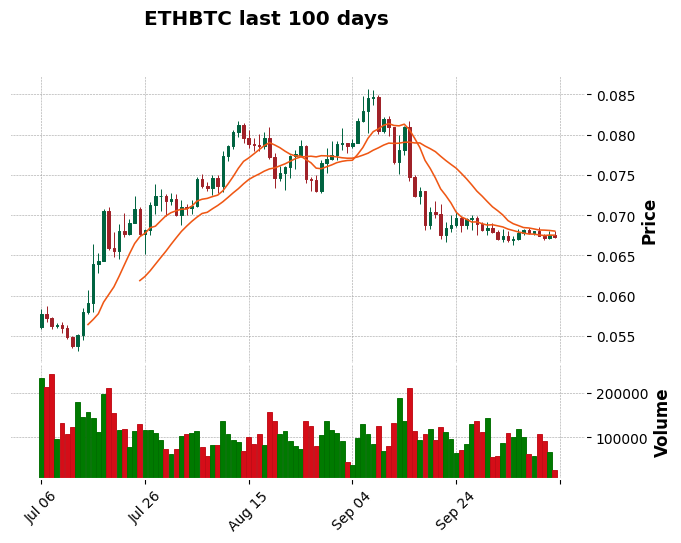

In [74]:
mpf.plot(hist_df.set_index('Close time').tail(100),
        type='candle',style='charles', volume=True,
        title='ETHBTC last 100 days',
        mav=(10,20))